# Online Shoppers Intention

### a. Specifying the data analysis question.
Examine the characteristics of the different customer groups

### b. Defining the metric of success
For this project to be a success, I will:

*   Implemnet kmeans clustering
*   Implement heirachical clustering
*   Provide mareting insights using the finding of the project



### c. Understanding the context
Market and customer analysis is fudamental for the success of any business as it enables the service provided to optimize their techniques to ensure the reach the right customers. A common problem that marketing teams face is that the desired outcome is often unknown hence the need for building a system that can infer trends from available data which will inform the marketing strategies. 
Machine learning in sales and marketing is an efficient way to find out more information about the customer and target them as best as possible. An advantage of using unsupervised learning is that it makes it easier to predict customer behavior since they are segmented into multiple categories which can inform ad targetting techniques which is the aim of this project.


### d. Recording the experimental design


* Sourcing the data
* Checking the data
* Cleaning the data
* Perform exploratory data analysis
* Implement data modelling
* Challenge the solution
* Follow up questions












## Load the data

In [ ]:
# load csv file
library(readr)
intentions <- read_csv('online_shoppers_intention.csv')

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



In [ ]:
# preview file
library(tibble)
glimpse(intentions)

Rows: 12,330
Columns: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser                 <

From the glimpse we can observe that the data set has 12,330 rows and 18 columns. Of the 18 columns, 10 are of numerical data type, while 8 are of chategorical data type although some columns have already been encoded. There are 2 columns with a logical data type.

In [ ]:
# preview the first six rows
head(intentions)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [ ]:
# preview the last six rows
tail(intentions)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [ ]:
# check colnames 
colnames(intentions)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

## Clean the data set

In [ ]:
# check columns for appropriate data types
class(intentions)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [ ]:
# checking for missing values
colSums(is.na(intentions))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

We observe that majority of the missing values are in the numerical columns with 14 in each column excluding the SpecialDay.

In [ ]:
# omit null values
nrow(intentions)
intentions <- intentions[complete.cases(intentions),]
nrow(intentions)

[1] 12330

[1] 12316

Since there are a snal number of missing values relative to the number of data points, we can omit the rows with missing values.

In [ ]:
# checking for duplicates
duplicates <- intentions[duplicated(intentions),] 
nrow(duplicates)

# remove duplicate values
intentions <- unique(intentions)
nrow(intentions)

[1] 117

[1] 12199

We observe that there are 117 duplicated rows in the data set which I dropped using the unique function and checked the rows to confirm null values were accurately removed.

In [ ]:
# get numerical columns
numerical <- intentions[,1:10] # omit categorical variables

Administrative <- intentions$Administrative
Administrative_Duration <- intentions$Administrative_Duration
Informational <- intentions$Informational
Informational_Duration <- intentions$Informational_Duration
ProductRelated <- intentions$ProductRelated
ProductRelated_Duration <- intentions$ProductRelated_Duration
BounceRates <- intentions$BounceRates
ExitRates <- intentions$ExitRates
PageValues <- intentions$PageValues
SpecialDay <- intentions$SpecialDay

Get numerical columns and assign them to variable names for checking outliers.

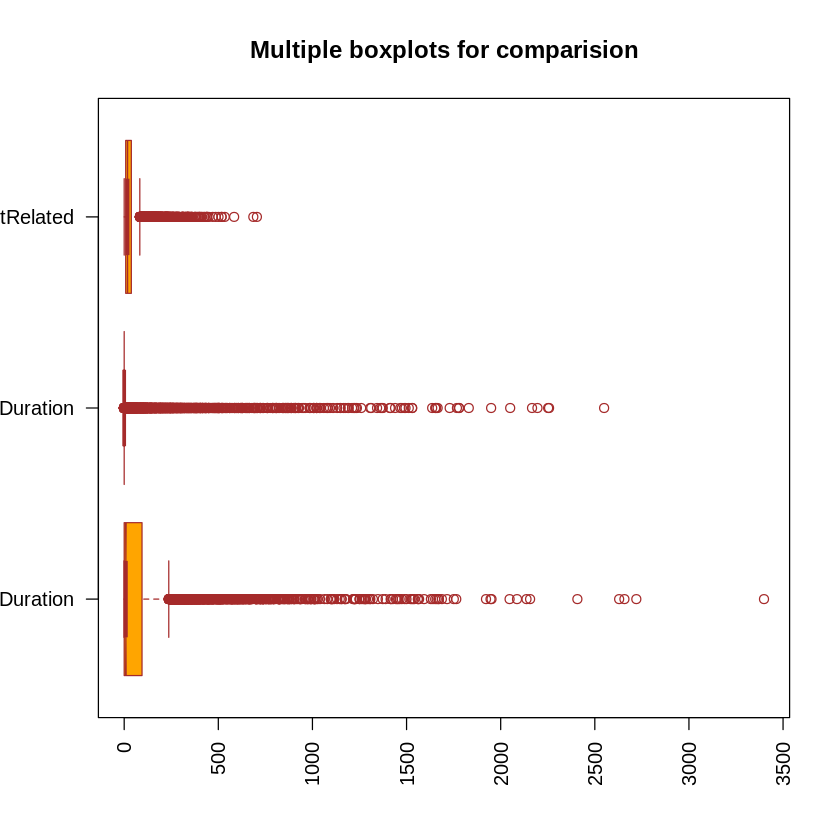

In [ ]:
# check for outliers in nuemrical columns
boxplot(Administrative_Duration, Informational_Duration, ProductRelated,
main = "Multiple boxplots for comparision",
#at = c(1,2,4,5),
names = c('Administrative_Duration','Informational_Duration','ProductRelated'),
las = 2,
col = c("orange","red"),
border = "brown",
horizontal = TRUE,
notch = TRUE
)

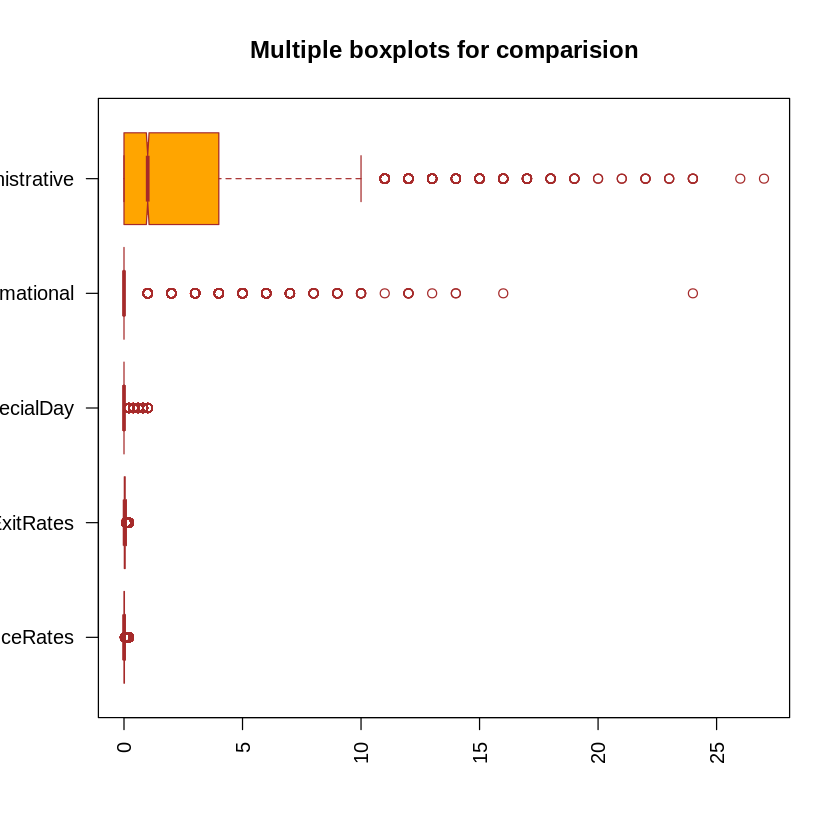

In [ ]:
# check for outliers in nuemrical columns
boxplot(BounceRates, ExitRates, SpecialDay, Informational, Administrative,
main = "Multiple boxplots for comparision",
#at = c(1,2,4,5),
names = c('BounceRates','ExitRates','SpecialDay', 'Informational', 'Administrative'),
las = 2,
col = c("orange","red"),
border = "brown",
horizontal = TRUE,
notch = TRUE
)

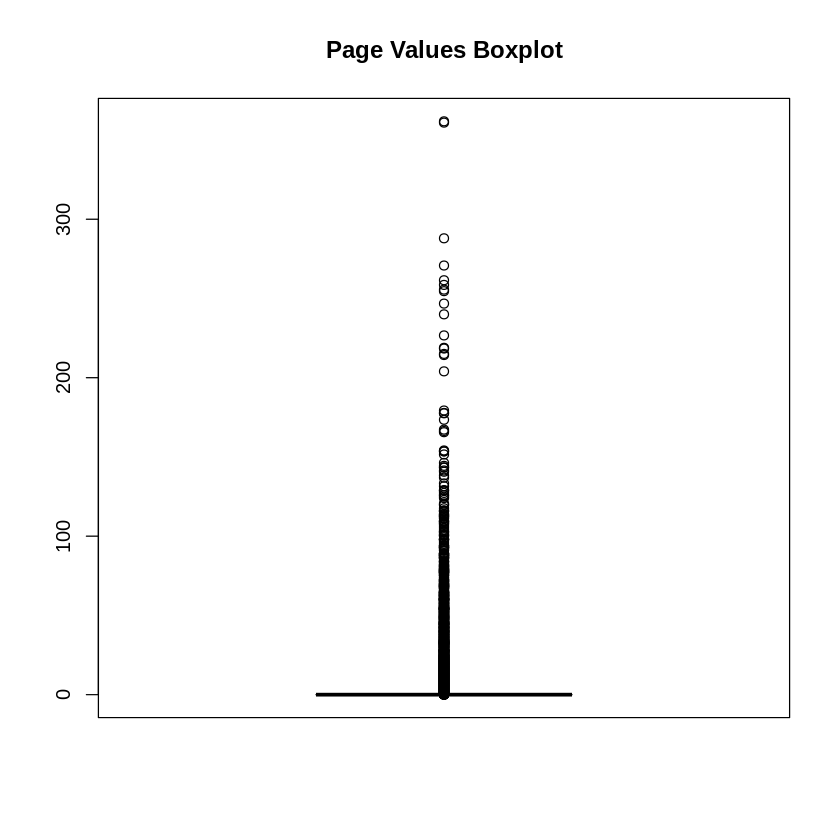

In [ ]:
# check for outliers in PageValues
boxplot(PageValues, main='Page Values Boxplot')

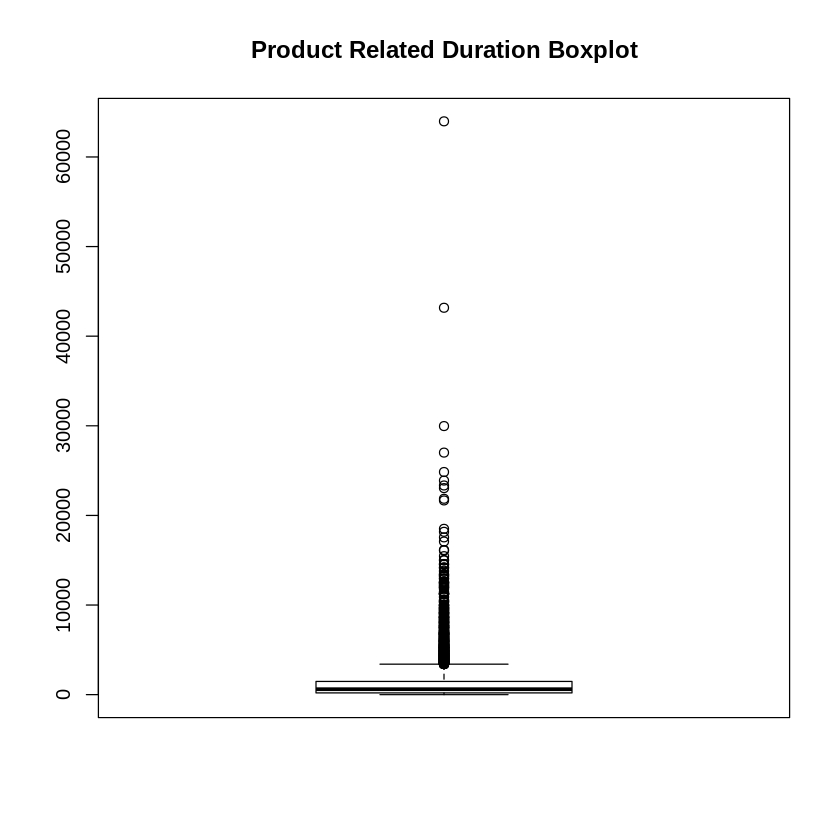

In [ ]:
# check for outliers in ProductRelated_Duration
boxplot(ProductRelated_Duration, main='Product Related Duration Boxplot')

All of the numerical columns have a lot of out;iers. Since dropping the values will remove too many data points, I will implement techniques such as normalization to minimize their effect while I will implement DBSCAN which is good at handling outliers.

In [ ]:
# encode categorical columns
install.packages('caret')
library(caret)

intentions_dmy <- dummyVars(" ~ .", data = intentions, fullRank = T)
intentions_transformed <- data.frame(predict(intentions_dmy, newdata = intentions))

glimpse(intentions_transformed)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: ggplot2



Rows: 12,199
Columns: 27
$ Administrative               <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ Administrative_Duration      <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ Informational                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ ProductRelated               <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7…
$ ProductRelated_Duration      <dbl> 0.000000, 64.000000, -1.000000, 2.666667…
$ BounceRates                  <dbl> 0.200000000, 0.000000000, 0.200000000, 0…
$ ExitRates                    <dbl> 0.200000000, 0.100000000, 0.200000000, 0…
$ PageValues                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay                   <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, …
$ MonthDec                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ MonthFeb                     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ MonthJul                 

## Univariate Analysis

In [ ]:
library(data.table)

intentions_transformed <- data.table(intentions_transformed) 

In [ ]:
numerical_cols = intentions_transformed[,1:10] # numeric columns

In [ ]:
# check quantiles for numeric columns
quantiles <- numerical_cols[,lapply(.SD, quantile)]
quantile_range = list('min',25,50,75,'max')
rownames(quantiles) <- quantile_range
quantiles

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
min,0.00000000,0.0000000000,0,0.0000000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0
25,0.00000000,0.0002941393,0,0.0003920992,0.01134752,0.003041575,0.00000000,0.07111289,0,0
50,0.03703704,0.0029413927,0,0.0003920992,0.02553191,0.009543513,0.01465201,0.12500000,0,0
75,0.14814815,0.0281638356,0,0.0003920992,0.05390071,0.023111775,0.08333333,0.24242424,0,0
max,1.00000000,1.0000000000,1,1.0000000000,1.00000000,1.000000000,1.00000000,1.00000000,1,1


The table shows the different quantile values for each numeric column including the minimum value, 25th quantile, median, 75th quantile, and the maximum values.

In [ ]:
# install flibrary for measures of dispersion and central tendencies
install.packages("fBasics", dependencies=TRUE)
library('fBasics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Measures of central tendency and dispersion

In [ ]:
# check means of numerical columns
colMeans(numerical_cols)

Administrative Administrative_Duration           Informational 
             0.08666770              0.02432007              0.02120051 
 Informational_Duration          ProductRelated ProductRelated_Duration 
             0.01405179              0.04547298              0.01889046 
            BounceRates               ExitRates              PageValues 
             0.10223368              0.20748392              0.01645411 
             SpecialDay 
             0.06197229

In [ ]:
# check the standard deviations
colStdevs(numerical_cols)

Administrative Administrative_Duration           Informational 
             0.12336486              0.05221801              0.05315905 
 Informational_Duration          ProductRelated ProductRelated_Duration 
             0.05546576              0.06326370              0.03001081 
            BounceRates               ExitRates              PageValues 
             0.22701251              0.23123580              0.05157452 
             SpecialDay 
             0.19971059

In [ ]:
# check the variances
colVars(numerical_cols)

Administrative Administrative_Duration           Informational 
           0.0152188888            0.0027267202            0.0028258849 
 Informational_Duration          ProductRelated ProductRelated_Duration 
           0.0030764510            0.0040022963            0.0009006489 
            BounceRates               ExitRates              PageValues 
           0.0515346814            0.0534699962            0.0026599312 
             SpecialDay 
           0.0398843209

In [ ]:
# check the column skewness
skewness(numerical_cols)

Administrative Administrative_Duration           Informational 
               1.946009                5.589523                4.012958 
 Informational_Duration          ProductRelated ProductRelated_Duration 
               7.536508                4.331601                7.250512 
            BounceRates               ExitRates              PageValues 
               3.152486                2.232851                6.347882 
             SpecialDay 
               3.284077

We can observe that all the numerical variables are positively skewed with values greater than 1.

In [ ]:
# check the column kurtosis
kurtosis(numerical_cols)

Administrative Administrative_Duration           Informational 
               4.634854               50.085181               26.637680 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              75.451225               31.043445              136.567907 
            BounceRates               ExitRates              PageValues 
               9.253055                4.623003               64.929169 
             SpecialDay 
               9.783958

We can observe that all variables have a Leptokurtic  distribution as they have kurtosis values greater than 3.

In [ ]:
# define a function to check the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

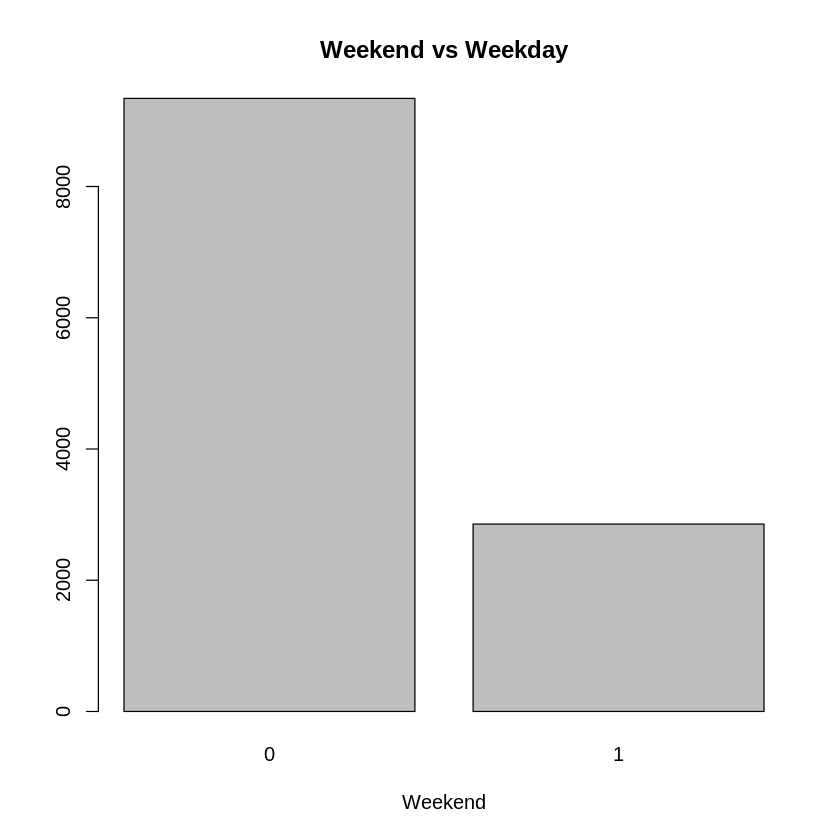

In [ ]:
# check Weekend count distribution
barplot(table(intentions_transformed$WeekendTRUE), main='Weekend vs Weekday', xlab='Weekend')

Most of the daya was obtained over the weekdays than weekends which is reflective of a normal week.

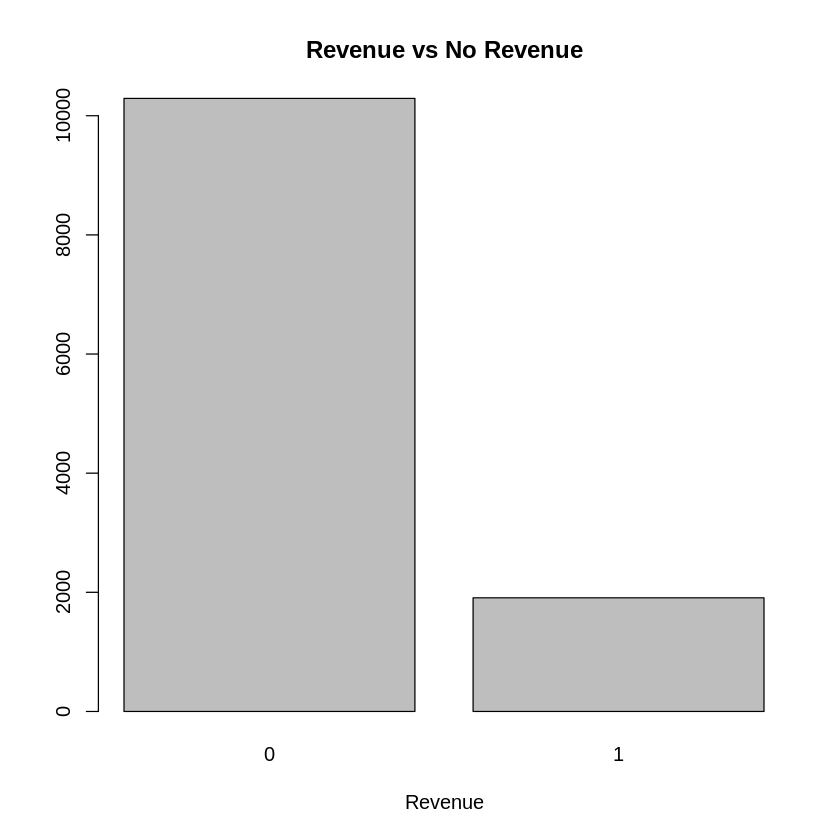

In [ ]:
# check Revenue count distribution
barplot(table(intentions_transformed$RevenueTRUE), main='Revenue vs No Revenue', xlab='Revenue')

Most of the data points did not have any revenue returns.

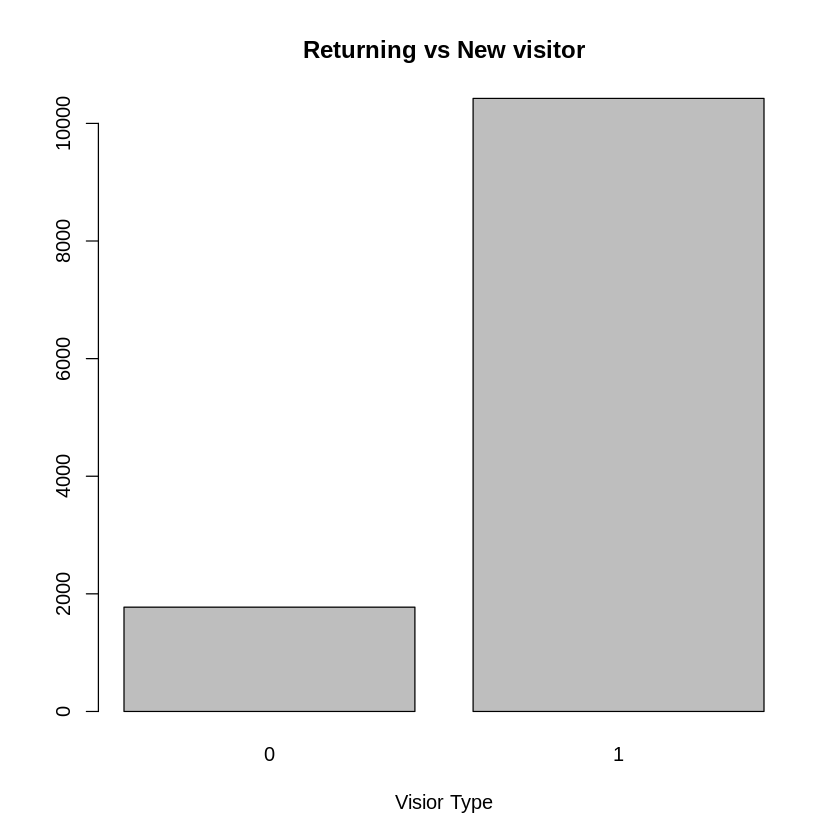

In [ ]:
# check Visitor type count distribution
barplot(table(intentions_transformed$VisitorTypeReturning_Visitor	), main='Returning vs New visitor', xlab='Visior Type')

The number of new visitors was greater than the number of returning visitors.

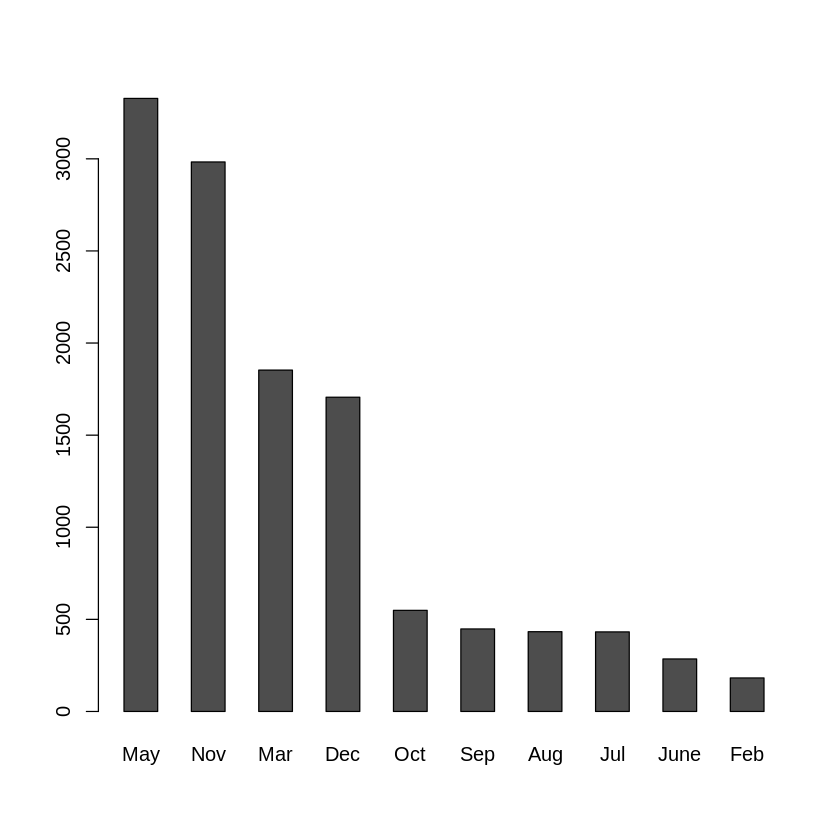

In [ ]:
# get frequencies of month column
month_frequency <- sort(table(intentions$Month), decreasing=T) # sorting to identify 
month_frequency <- data.frame(month_frequency)

rownames(month_frequency) <- month_frequency$Var1
month_frequency$Var1 <- NULL

barplot(t(as.matrix(month_frequency)), beside=TRUE)

Most of the data was collected in May with the least being collected in February. It is important to note that not all months were sampled.

## Bivariate Analysis

In [ ]:
head(intentions_transformed)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,MonthOct,MonthSep,OperatingSystems,Browser,Region,TrafficType,VisitorTypeOther,VisitorTypeReturning_Visitor,WeekendTRUE,RevenueTRUE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,0,0,1,1,1,1,0,1,0,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,0,0,2,2,1,2,0,1,0,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,0,0,4,1,9,3,0,1,0,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,0,0,3,2,2,4,0,1,0,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,0,0,3,3,1,4,0,1,1,0
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,0,0,2,2,1,3,0,1,0,0


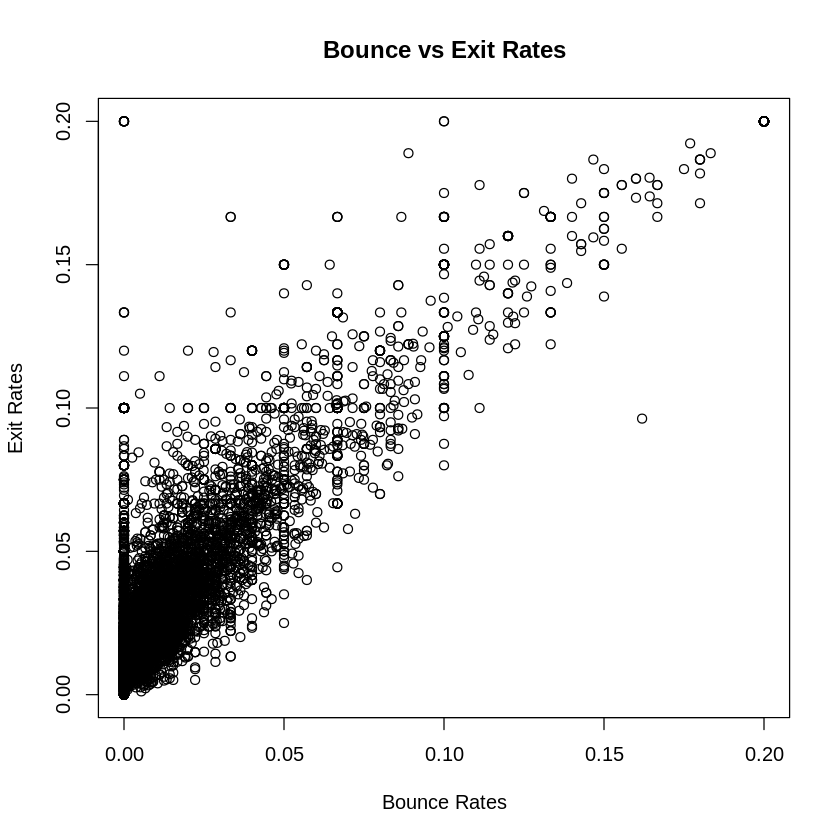

In [ ]:
# plot scatter plot between bounce rates and exit rates
plot(BounceRates, ExitRates, xlab='Bounce Rates', ylab='Exit Rates', main='Bounce vs Exit Rates')

There is a strong positive correlation between the bounce rates and the exit rates. Bounce rate refers to  the percentage of single-engagement sessions while the exit rates refers to the percentage of exits on a page.


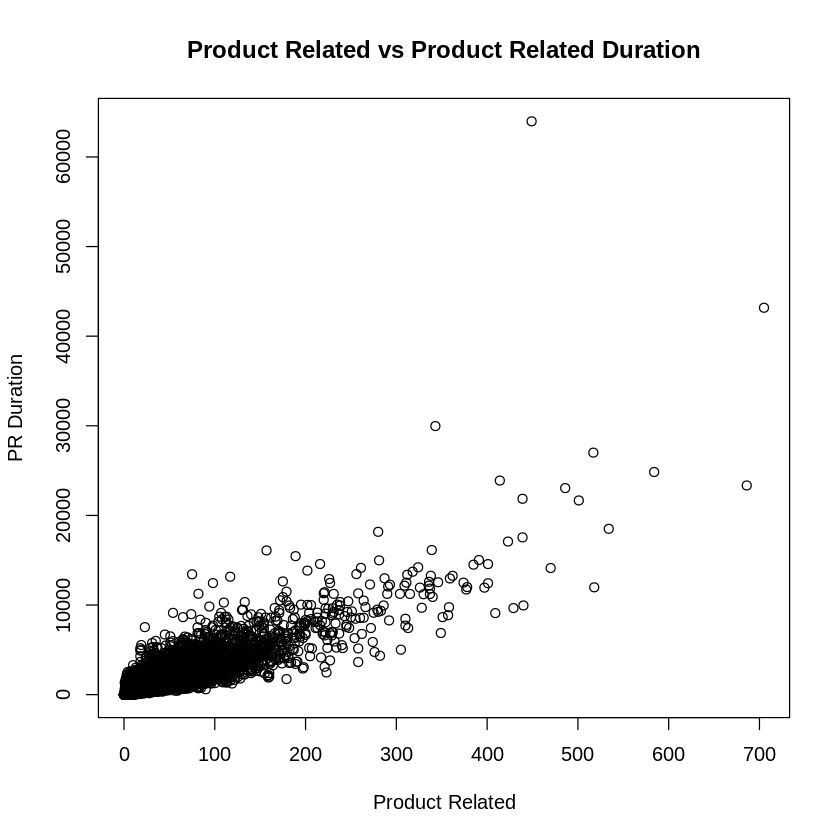

In [ ]:
# plot scatter plot between bounce rates and exit rates
plot(ProductRelated, ProductRelated_Duration, xlab='Product Related', ylab='PR Duration', main='Product Related vs Product Related Duration')

There is also a strong correlation between the number of product related pages that are visited and the time spent.

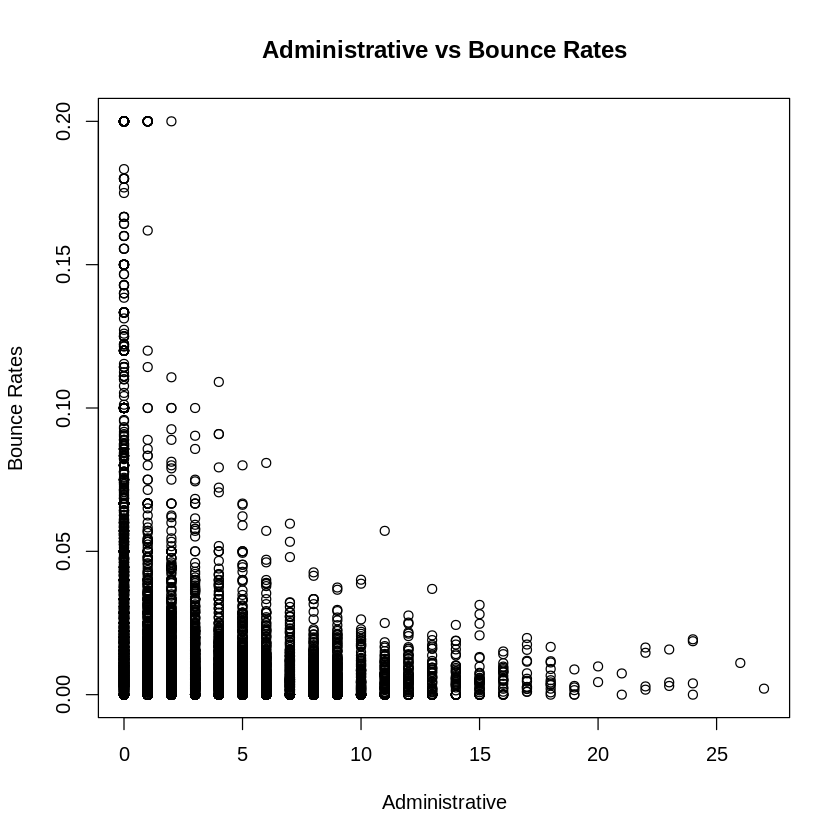

In [ ]:
# plot scatter plot between bounce rates and exit rates
plot(Administrative, BounceRates, xlab='Administrative', ylab='Bounce Rates', main='Administrative vs Bounce Rates')

It is interesting that the more number of administrative pages a person clicked, the lower the bounce rate.

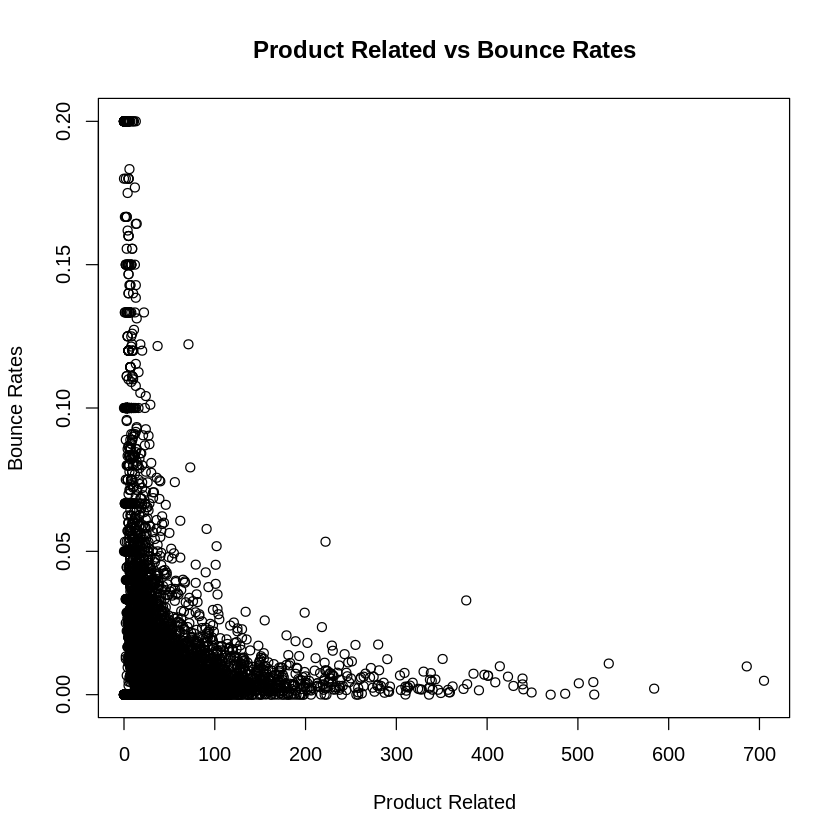

In [ ]:
# plot scatter plot between bounce rates and exit rates
plot(ProductRelated, BounceRates, xlab='Product Related', ylab='Bounce Rates', main='Product Related vs Bounce Rates')

Individuals that open more product related pages also have lower bounce rates.

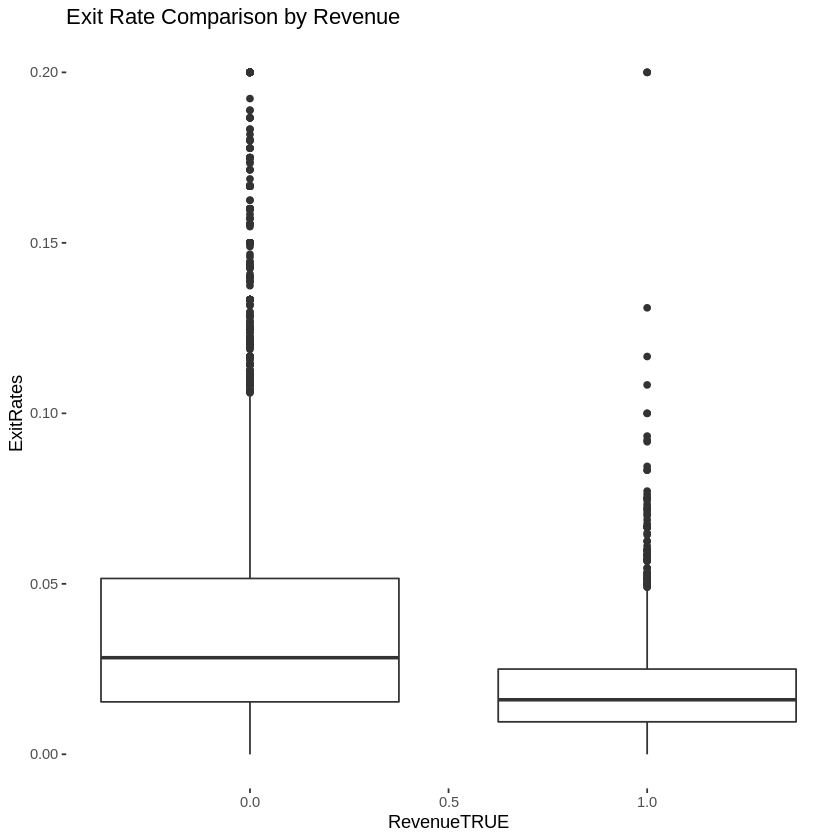

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = ExitRates, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Exit Rate Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

As expected, the customers that were successfully converted had lower exit rates than those who were not converted.

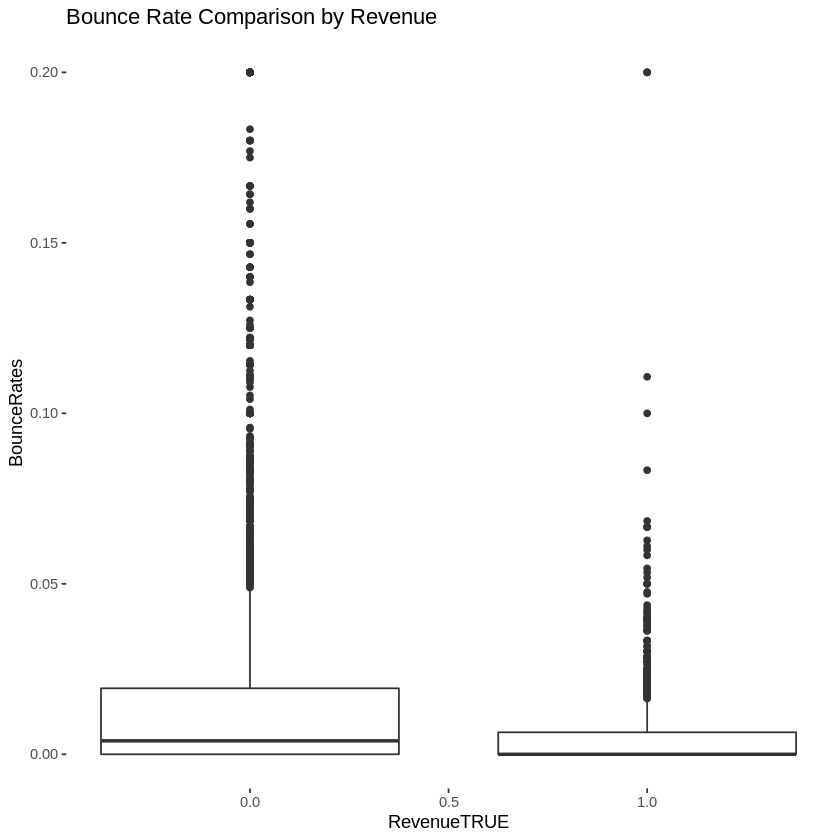

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = BounceRates, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Bounce Rate Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

Customers who were converted also had lower bounce rates.

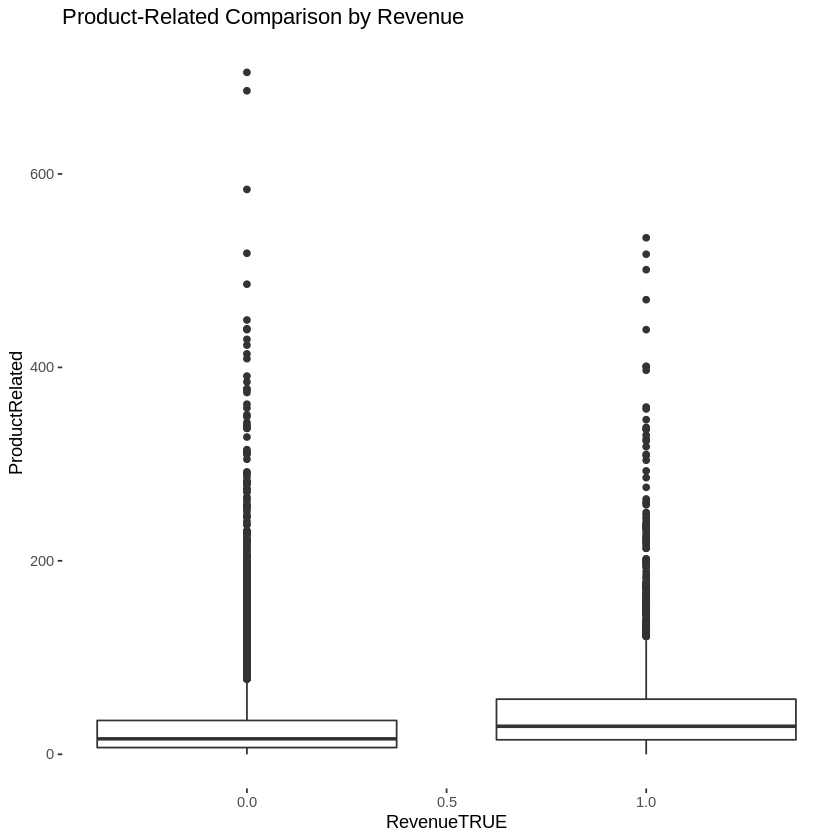

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = ProductRelated, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Product-Related Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

Individuals who opened more product related pages were more likely to be converted than those who opened fewer pages.

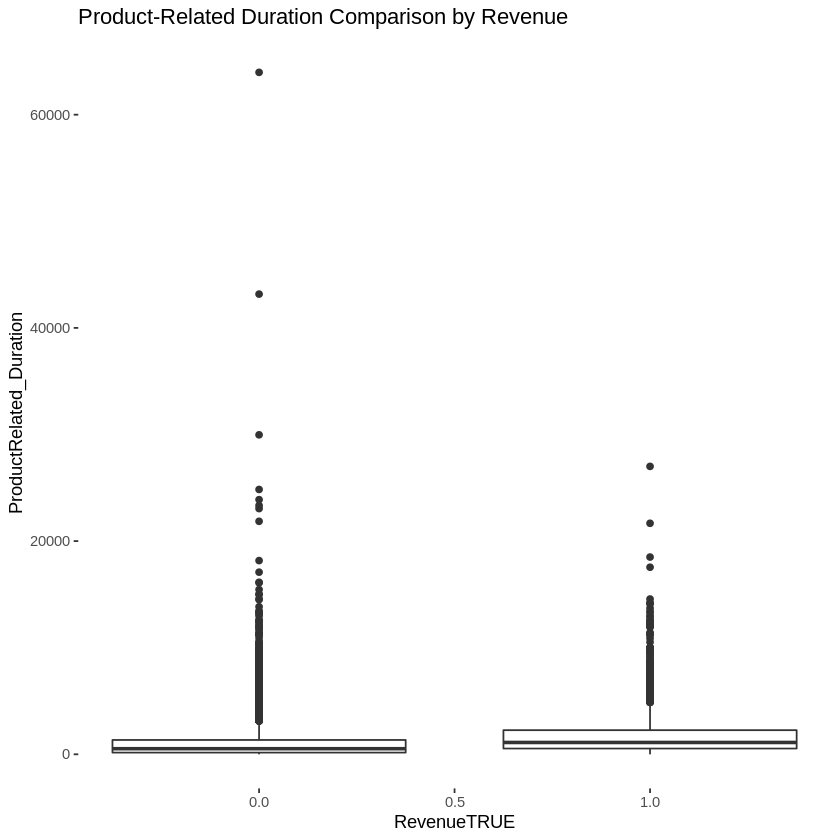

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = ProductRelated_Duration, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Product-Related Duration Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

Individuals who were converted also spent slightly more time on product related pages than their counterparts who were not converted.

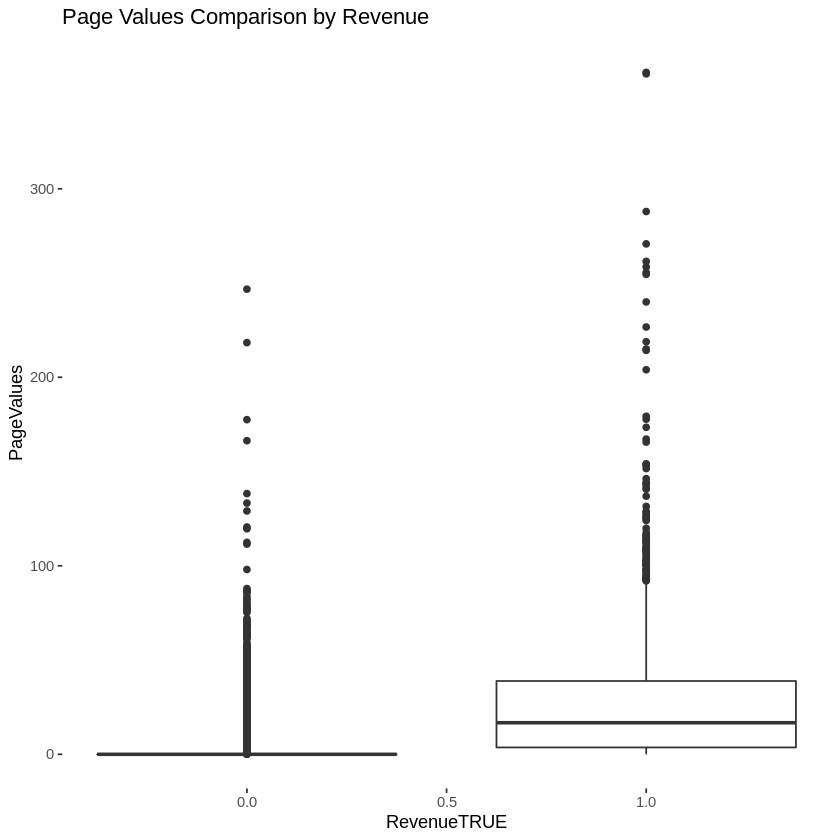

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = PageValues, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Page Values Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

Page value is a strong indicator of the likleihood of a conversion since those who were converted had significantly higher average page values.

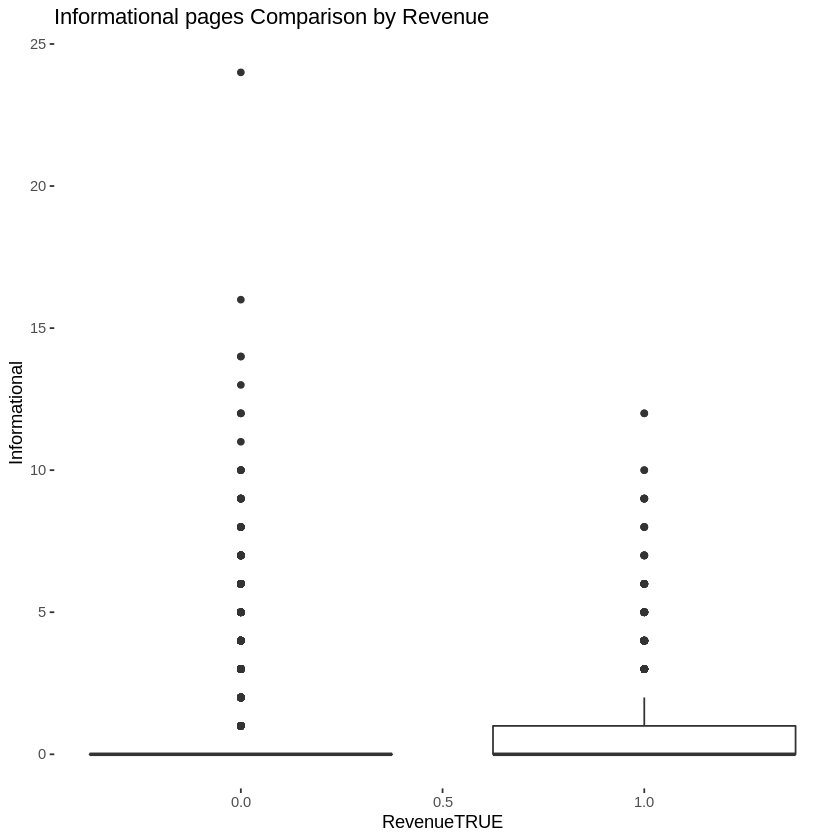

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = Informational, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Informational pages Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

Customers who were converted opened more informational pages than those who were not converted.

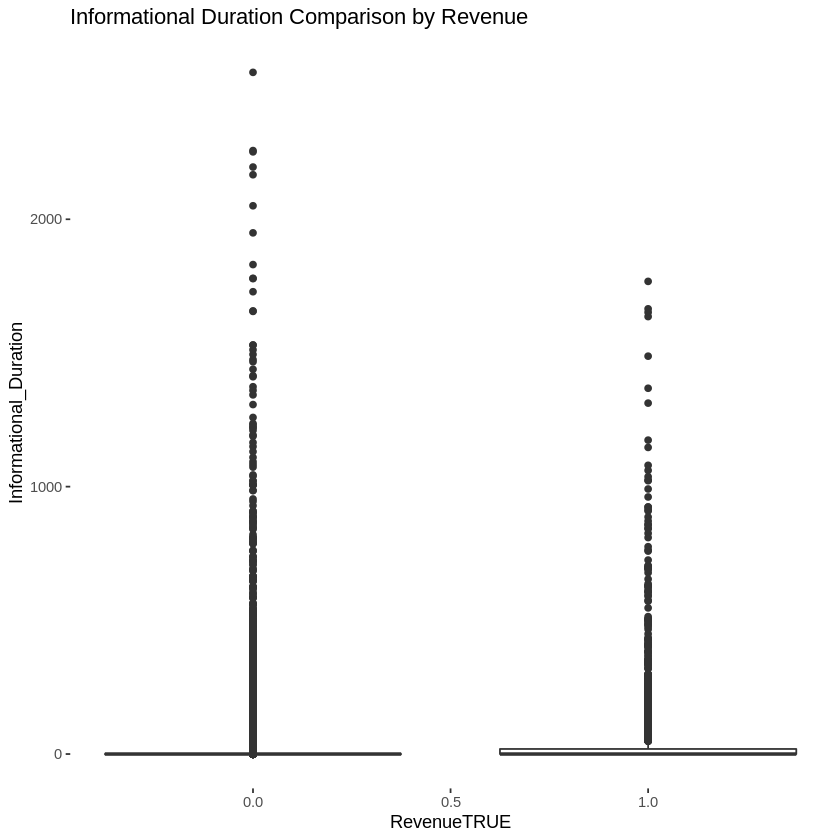

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = Informational_Duration, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Informational Duration Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

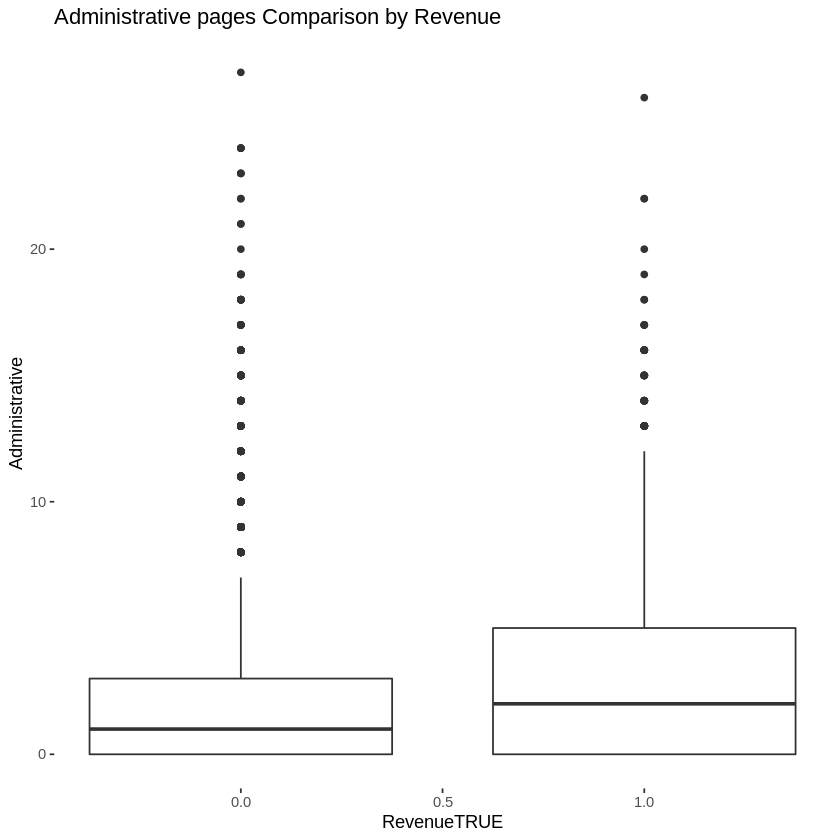

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = Administrative, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Administrative pages Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

COnverted customers also opened more administartive pages than those who were not converted.

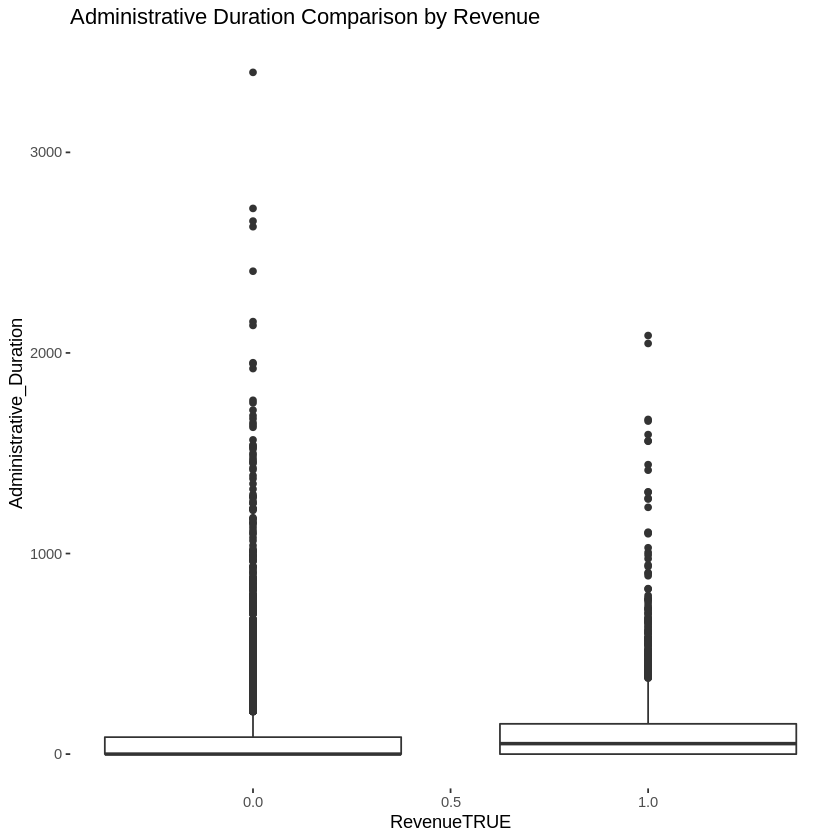

In [ ]:
# compare mean and dispersion of 
ggplot(data = intentions_transformed,
  aes(x = RevenueTRUE, y = Administrative_Duration, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Administrative Duration Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

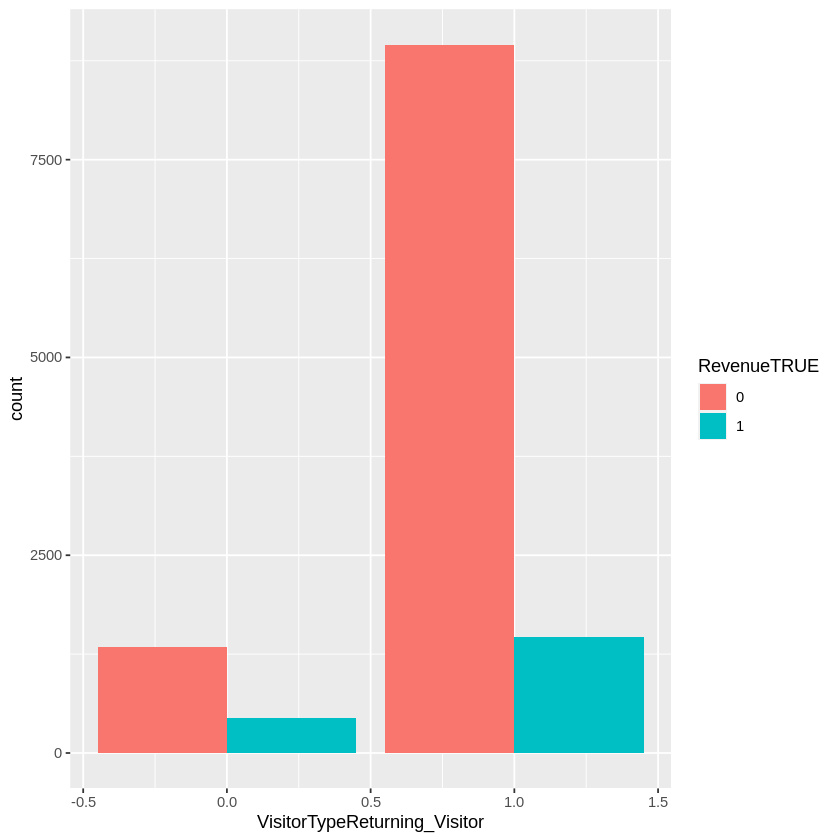

In [ ]:
#converting the target variable, clicked on ads, to a factor variable
intentions_transformed$RevenueTRUE= factor(intentions_transformed$RevenueTRUE)

#finding out which gender is more likely to click on the ads
ggplot(data = intentions_transformed) + 
  geom_bar(mapping = aes(x = VisitorTypeReturning_Visitor, fill = RevenueTRUE), position = "dodge")

More returning visitors were converted than those who were new to the site. It is also important to note that there are many customers who are returning customers yet they have not been converted.

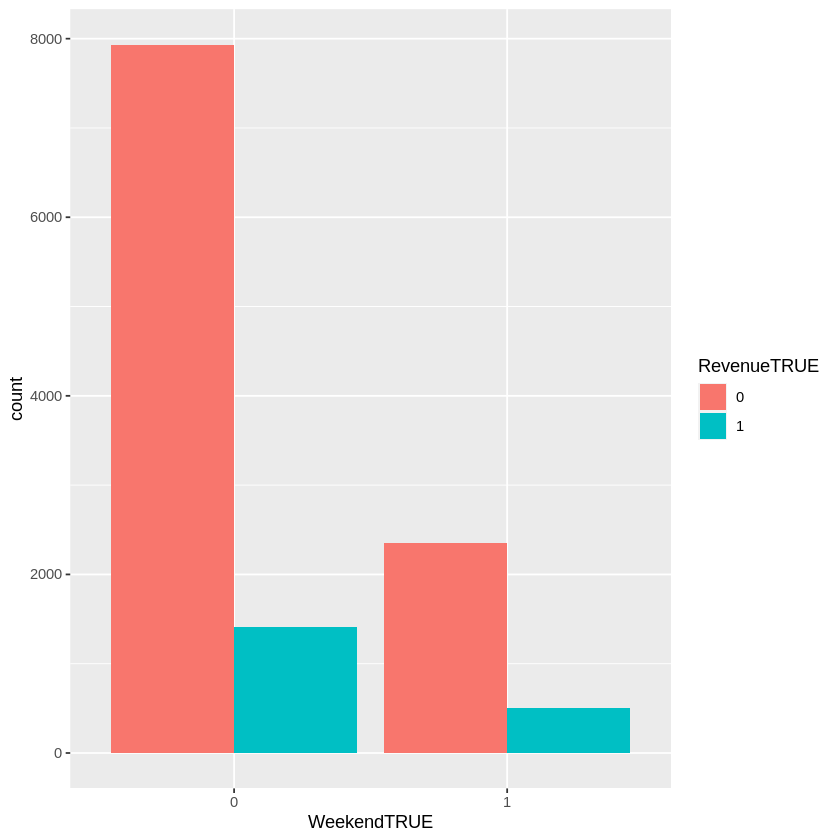

In [ ]:
#converting the target variable, clicked on ads, to a factor variable
intentions_transformed$WeekendTRUE= factor(intentions_transformed$WeekendTRUE)

#finding out which gender is more likely to click on the ads
ggplot(data = intentions_transformed) + 
  geom_bar(mapping = aes(x = WeekendTRUE, fill = RevenueTRUE), position = "dodge")

Most of the conversions were on weekdays compared to the weekends.

In [ ]:
library(dplyr)
# distinguish between revenue and no revenue
revenue <- filter(intentions, Revenue == 1)
no_revenue <- filter(intentions, Revenue == 0)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:timeSeries’:

    filter, lag


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




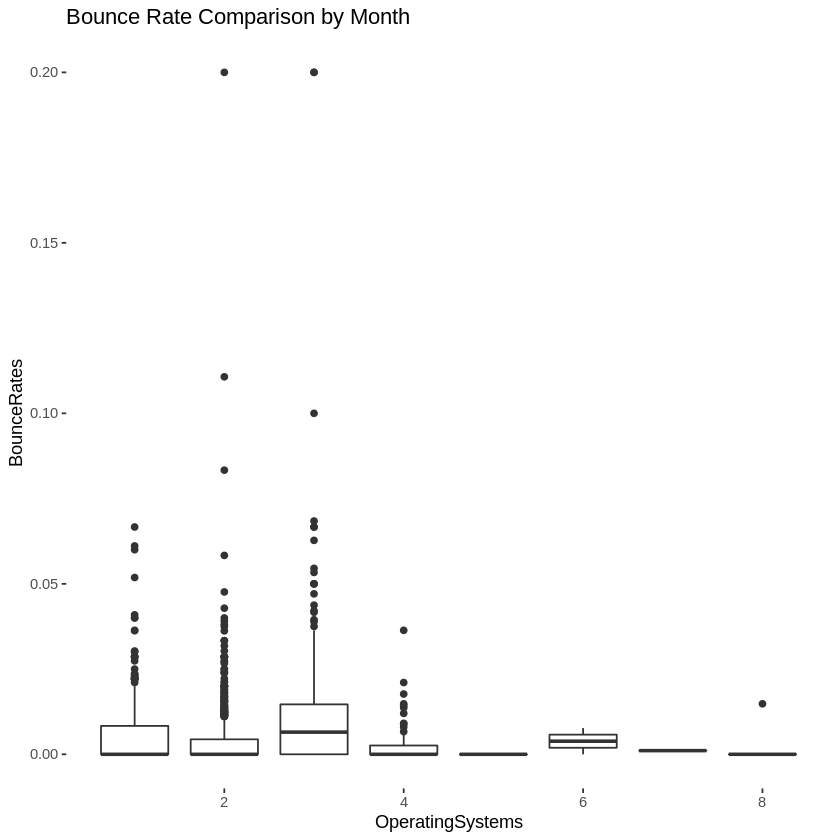

In [ ]:
# compare mean and dispersion of 
ggplot(data = revenue,
  aes(x = OperatingSystems, y = BounceRates, group = OperatingSystems)) +
  geom_boxplot() +
  labs(title = "Bounce Rate Comparison by Month") +
  theme(panel.background = element_rect(fill = "white"))

Customers who used type 3 operating system had the highest bounce rates while those on type 5, 7, and 8 had the lowest bounce rates.

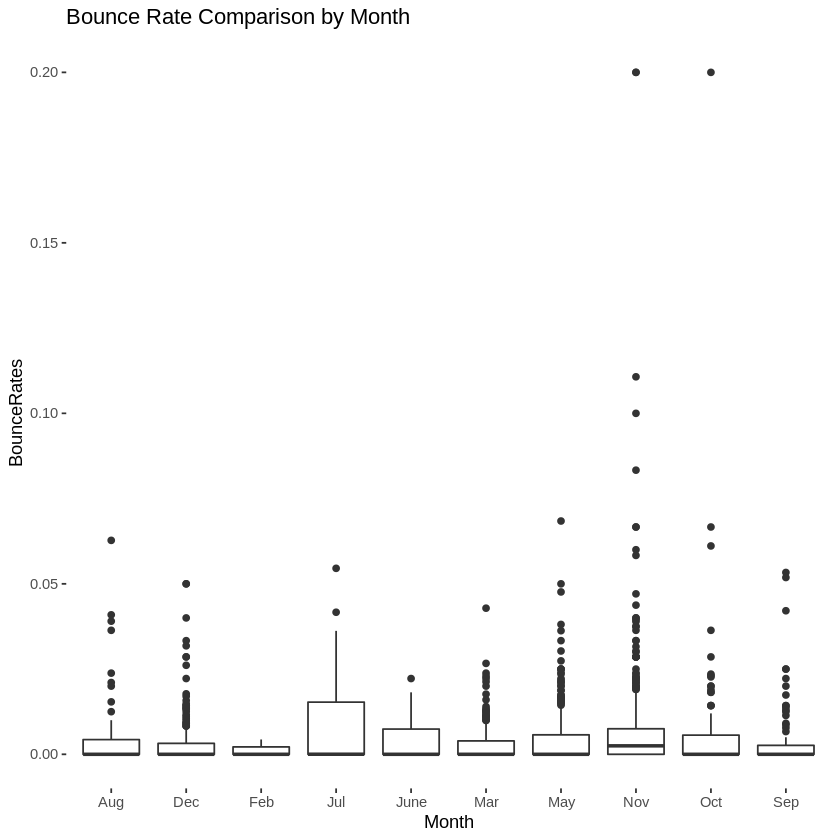

In [ ]:
# compare mean and dispersion of 
ggplot(data = revenue,
  aes(x = Month, y = BounceRates, group = Month)) +
  geom_boxplot() +
  labs(title = "Bounce Rate Comparison by Month") +
  theme(panel.background = element_rect(fill = "white"))

July had the highest bounce rates on average.

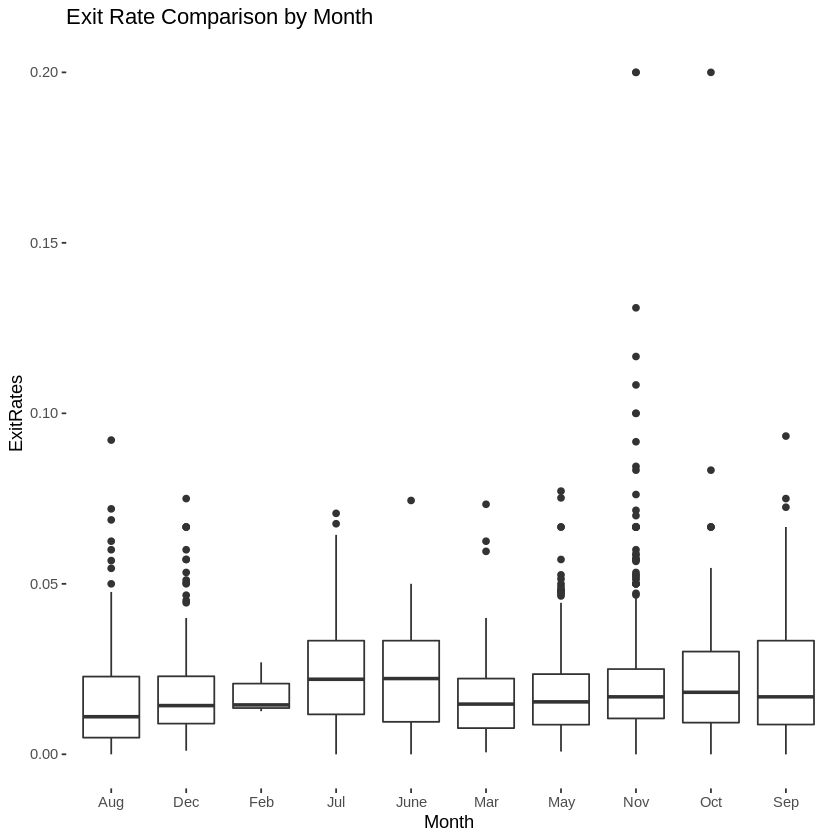

In [ ]:
# compare mean and dispersion of 
ggplot(data = revenue,
  aes(x = Month, y = ExitRates, group = Month)) +
  geom_boxplot() +
  labs(title = "Exit Rate Comparison by Month") +
  theme(panel.background = element_rect(fill = "white"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



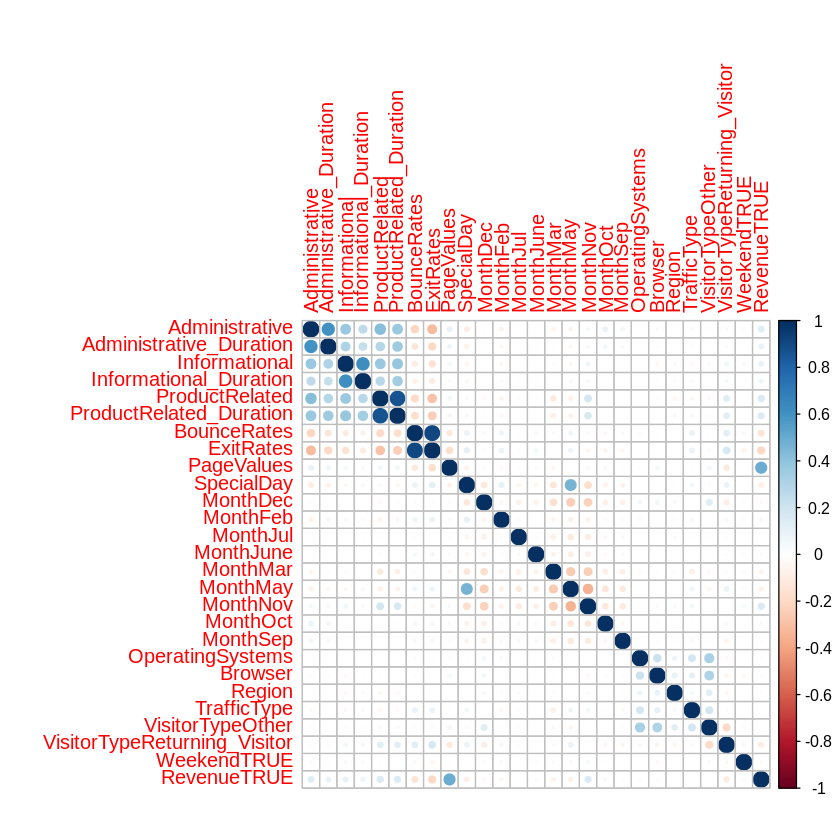

In [ ]:
# change columns to numeric
intentions_transformed$WeekendTRUE <- as.numeric(as.character(intentions_transformed$WeekendTRUE))
intentions_transformed$RevenueTRUE <- as.numeric(as.character(intentions_transformed$RevenueTRUE))

install.packages("corrplot") # install corrplot package
library(corrplot)

# check correlation score between numerical variables
mydata.cor <- cor(intentions_transformed, use="pairwise.complete.obs")

corrplot(mydata.cor) # plot correlation matrix


The larger and darker the blue dot, the stronger the positive correlation between the values. The larger and darker the red dots, the stronger the negative correlation between values.

## Modelling


In [ ]:
# first we normalize the variables
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))}

# normalize variables
intentions_transformed$Administrative <- normalize(intentions_transformed$Administrative)
intentions_transformed$Administrative_Duration <- normalize(intentions_transformed$Administrative_Duration)
intentions_transformed$Informational <- normalize(intentions_transformed$Informational)
intentions_transformed$Informational_Duration <- normalize(intentions_transformed$Informational_Duration)
intentions_transformed$ProductRelated <- normalize(intentions_transformed$ProductRelated)
intentions_transformed$ProductRelated_Duration <- normalize(intentions_transformed$ProductRelated_Duration)
intentions_transformed$BounceRates <- normalize(intentions_transformed$BounceRates)
intentions_transformed$ExitRates <- normalize(intentions_transformed$ExitRates)
intentions_transformed$PageValues <- normalize(intentions_transformed$PageValues)
intentions_transformed$SpecialDay <- normalize(intentions_transformed$SpecialDay)
intentions_transformed$OperatingSystems <- normalize(intentions_transformed$OperatingSystems)
intentions_transformed$Browser <- normalize(intentions_transformed$Browser)
intentions_transformed$Region <- normalize(intentions_transformed$Region)
intentions_transformed$TrafficType <- normalize(intentions_transformed$TrafficType)

This is especially useful to minimize the effect of outliers.

In [ ]:
# applying the K-means clustering algorithm with no. of centroids(k)=3
result<- kmeans(intentions_transformed[,-27],2) # remove the class label

In [ ]:
# check cluster sizes
result$size 

[1] 3328 8871

In [ ]:
# getting the cluster center datapoint values
result$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,MonthNov,MonthOct,MonthSep,OperatingSystems,Browser,Region,TrafficType,VisitorTypeOther,VisitorTypeReturning_Visitor,WeekendTRUE
1,0.07356214,0.02094727,0.01785357,0.01115726,0.03795988,0.01552980,0.1251191,0.2361476,0.01517656,0.214242788,⋯,0.0000000,0.00000000,0.00000000,0.1605426,0.1146084,0.2678035,0.1830719,0.000000000,0.9041466,0.2145433
2,0.09158431,0.02558539,0.02245613,0.01513769,0.04829155,0.02015123,0.0936481,0.1967306,0.01693339,0.004847255,⋯,0.3362642,0.06188705,0.05050163,0.1606519,0.1126423,0.2696708,0.1538484,0.009130876,0.8359824,0.2414609


In [ ]:
result$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
   [37] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
   [73] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [109] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [145] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [181] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [217] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [253] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [289] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [325] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [361] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [397] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [433] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [469] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [505] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [541] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [577] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [613] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [649] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [685] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [721] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [757] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [793] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [829] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [865] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [901] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [937] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [973] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1009] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1045] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1081] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1117] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1153] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1189] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1225] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1261] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1333] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1369] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1405] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1441] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1477] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1513] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1549] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1585] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1621] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1657] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1693] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1729] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1765] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [18

These indicate the predicted clusters for each data point.

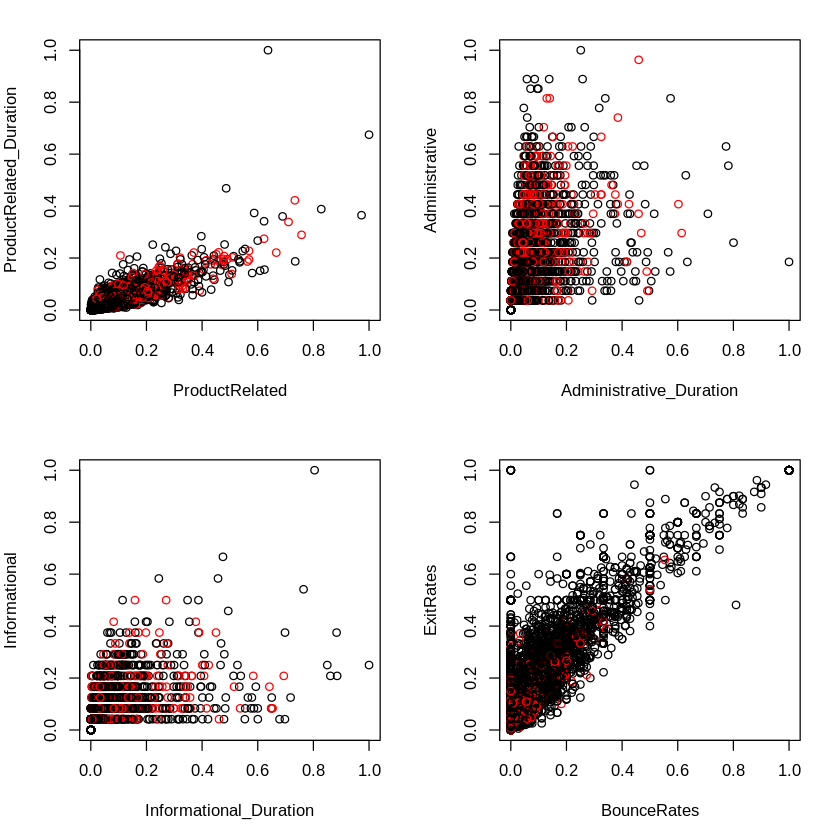

In [ ]:
# Visualizing the  known clusters
# ---
# 
par(mfrow = c(2,2), mar = c(5,4,2,2))

# Plotting to see how Ozone and Solar.R data points have been distributed in clusters
RevenueTRUE <- intentions_transformed$RevenueTRUE
#
intentions_transformed$RevenueTRUE= factor(intentions_transformed$RevenueTRUE)
RevenueTRUE <- intentions_transformed$RevenueTRUE

plot(intentions_transformed[,c('ProductRelated','ProductRelated_Duration')], col = RevenueTRUE) 
plot(intentions_transformed[,c('Administrative_Duration', 'Administrative')], col = RevenueTRUE)

# 
plot(intentions_transformed[,c('Informational_Duration', 'Informational')], col = RevenueTRUE)

#
plot(intentions_transformed[,c('BounceRates','ExitRates')], col = RevenueTRUE)

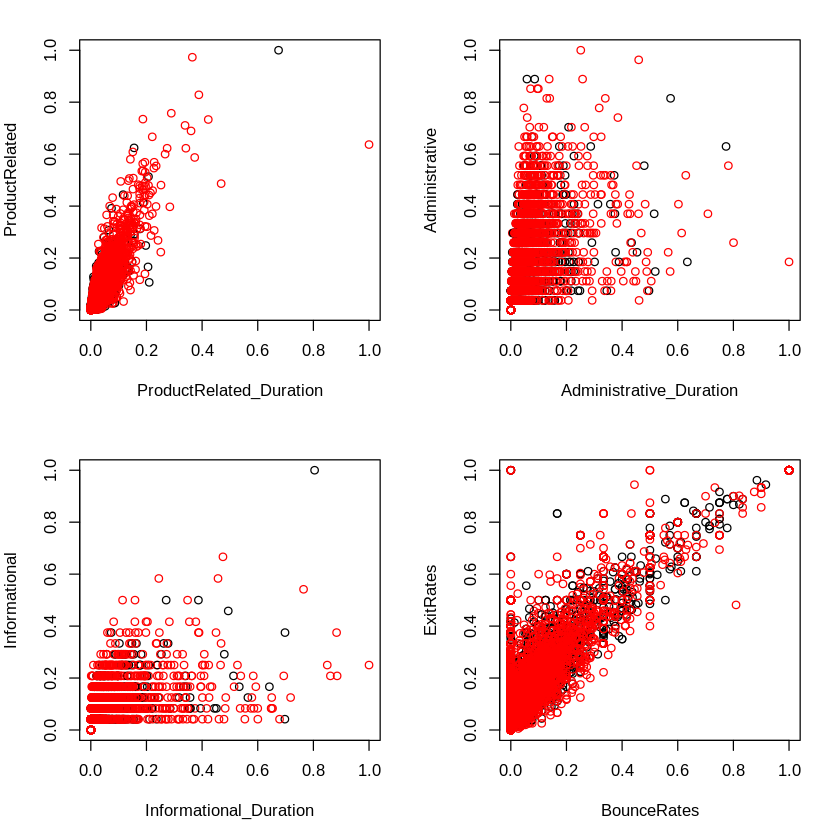

In [ ]:
# Verifying the results of clustering
# ---
# 
par(mfrow = c(2,2), mar = c(5,4,2,2))

# 
plot(intentions_transformed[,c('ProductRelated_Duration', 'ProductRelated')], col = result$cluster)

#
plot(intentions_transformed[,c('Administrative_Duration', 'Administrative')], col = result$cluster)

# 
plot(intentions_transformed[,c('Informational_Duration', 'Informational')], col = result$cluster)

#
plot(intentions_transformed[,c('BounceRates','ExitRates')], col = result$cluster)

The advantage of k means clustering is that we set the number of clusters that we want to fit our data in advance and is especially useful where we already know the number of classes which in our case is whether or not a customer was converted.

The disadvantage of this approach is that it is difficult to determine the appropriate numer of cluster when this information is not known. 

## Heirachicical clustering

In [ ]:
X <- intentions_transformed[,-27] #assign the data to a variable
hclust <- hclust(dist(X), method = "average") # clustering using average linkage

In [ ]:
# extract heights of the dendogram
round(hclust$height, 3)

[1] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
   [13] 0.000 0.000 0.000 0.000 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
   [25] 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
   [37] 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
   [49] 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.002 0.002
   [61] 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.003 0.003 0.003 0.003 0.003
   [73] 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
   [85] 0.003 0.003 0.003 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.005
   [97] 0.005 0.005 0.005 0.005 0.005 0.005 0.006 0.006 0.006 0.006 0.006 0.006
  [109] 0.007 0.007 0.007 0.007 0.007 0.007 0.008 0.008 0.008 0.008 0.008 0.009
  [121] 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.010 0.010 0.010 0.010
  [133] 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012
  [145] 0.012 0.012 0.012 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013
  [157] 0.013 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.015 0.015 0.015 0.015
  [169] 0.015 0.015 0.015 0.016 0.016 0.016 0.016 0.016 0.016 0.016 0.016 0.016
  [181] 0.016 0.017 0.017 0.017 0.017 0.017 0.017 0.017 0.018 0.018 0.018 0.018
  [193] 0.018 0.018 0.018 0.019 0.019 0.019 0.019 0.019 0.019 0.019 0.019 0.019
  [205] 0.019 0.020 0.020 0.020 0.020 0.020 0.020 0.020 0.020 0.021 0.021 0.021
  [217] 0.021 0.021 0.021 0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.023
  [229] 0.023 0.023 0.023 0.023 0.023 0.024 0.024 0.024 0.024 0.024 0.024 0.024
  [241] 0.024 0.024 0.024 0.024 0.024 0.025 0.025 0.025 0.025 0.025 0.025 0.025
  [253] 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.026 0.026
  [265] 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.027 0.027 0.027
  [277] 0.027 0.027 0.027 0.027 0.027 0.027 0.027 0.028 0.028 0.028 0.028 0.028
  [289] 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028
  [301] 0.028 0.029 0.029 0.029 0.029 0.029 0.029 0.029 0.029 0.029 0.029 0.029
  [313] 0.029 0.029 0.029 0.029 0.029 0.030 0.030 0.030 0.030 0.030 0.030 0.030
  [325] 0.030 0.030 0.030 0.030 0.030 0.030 0.031 0.031 0.031 0.031 0.031 0.031
  [337] 0.031 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032
  [349] 0.032 0.032 0.032 0.032 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
  [361] 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.034 0.034
  [373] 0.034 0.034 0.034 0.034 0.034 0.035 0.035 0.035 0.035 0.035 0.035 0.035
  [385] 0.035 0.035 0.035 0.035 0.035 0.036 0.036 0.036 0.036 0.036 0.036 0.036
  [397] 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036
  [409] 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037
  [421] 0.037 0.037 0.037 0.037 0.037 0.038 0.038 0.038 0.038 0.038 0.038 0.038
  [433] 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.039
  [445] 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039
  [457] 0.039 0.039 0.040 0.040 0.040 0.040 0.040 0.040 0.040 0.040 0.040 0.040
  [469] 0.040 0.040 0.040 0.040 0.040 0.040 0.041 0.041 0.041 0.041 0.041 0.041
  [481] 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041
  [493] 0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.042
  [505] 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043
  [517] 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.044 0.044 0.044 0.044
  [529] 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044
  [541] 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.045 0.045 0.045 0.045
  [553] 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045
  [565] 0.045 0.045 0.045 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046
  [577] 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046
  [589] 0.047 0.047 0.047 0.047 0.047 0.047 0.047 0.047 0.047 0.047 0.047 0.047
  [6

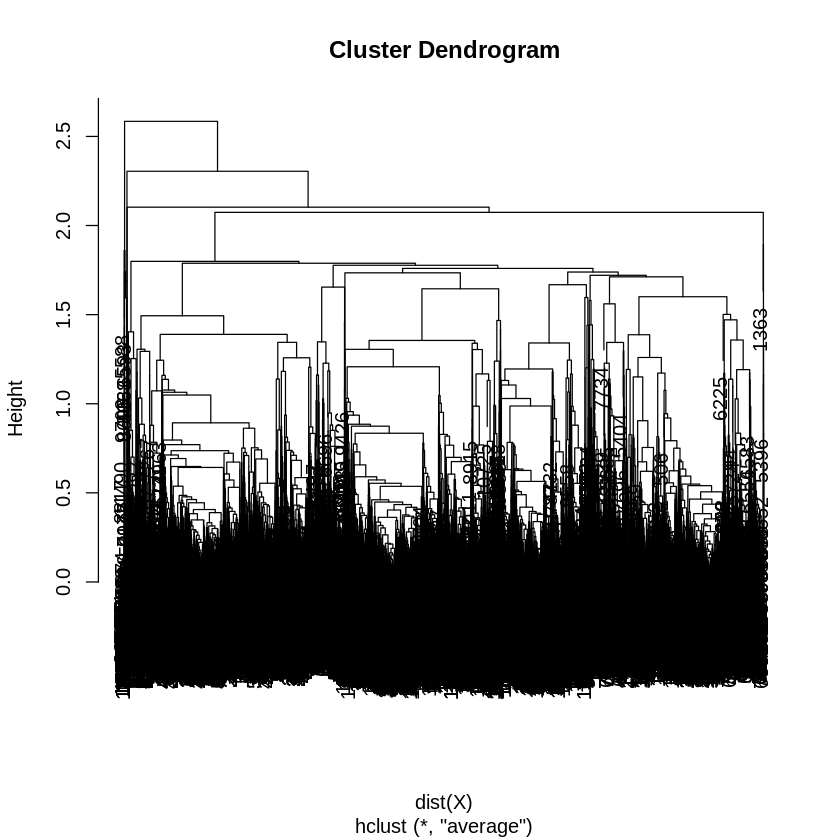

In [ ]:
# plot the dendograms
plot(hclust)

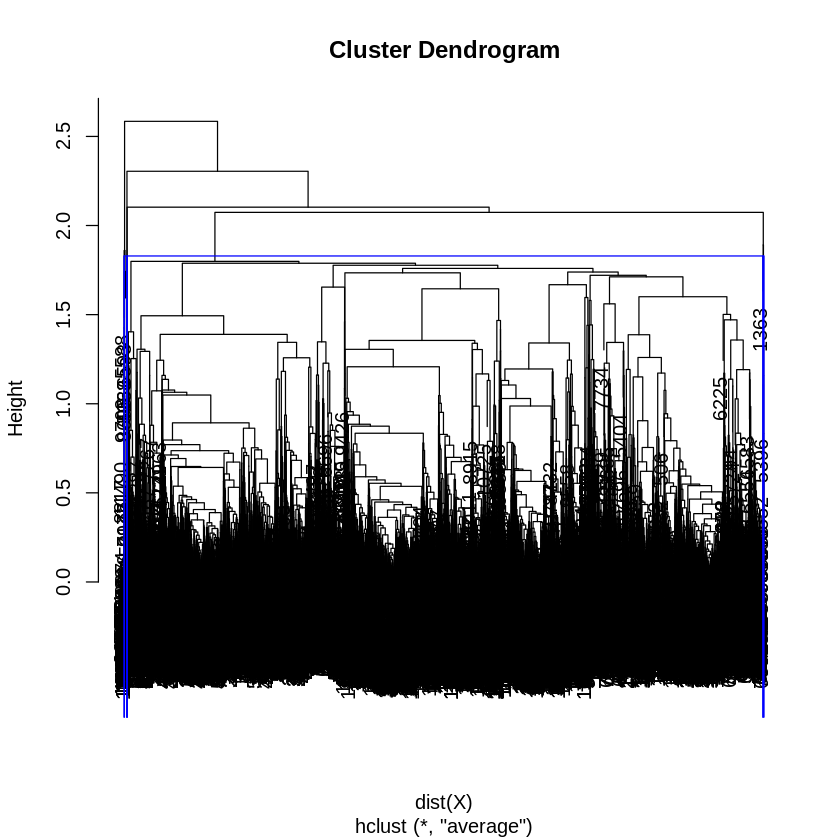

In [ ]:
# define the number of clusters
plot(hclust)
rect.hclust(hclust,
  k = 7, # k is used to specify the number of clusters
  border = "blue"
)

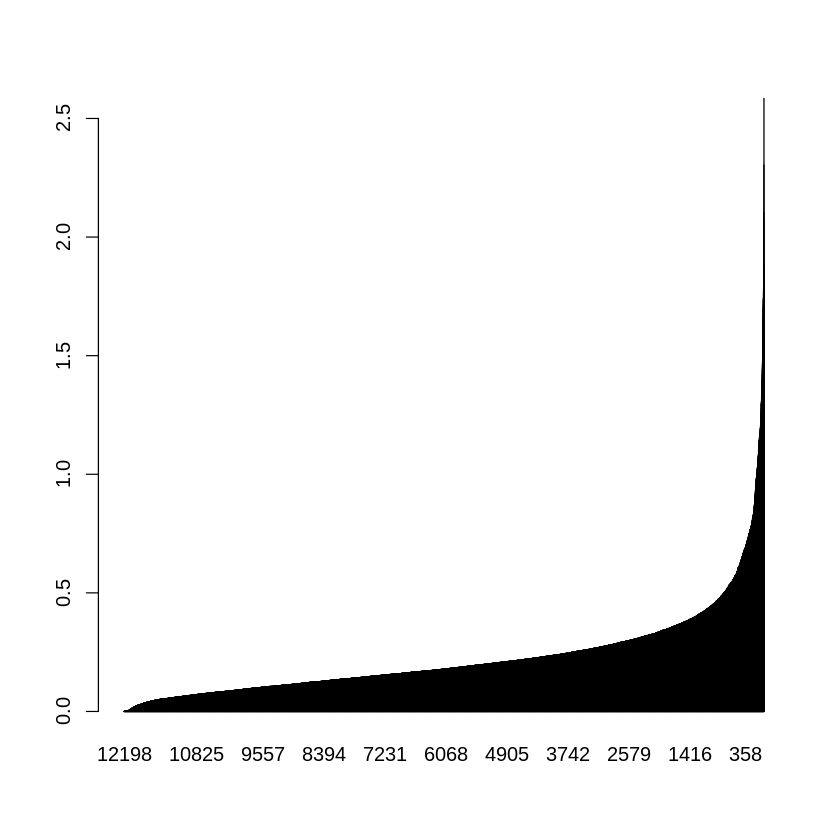

In [ ]:
# check optimal number of lcusters
barplot(hclust$height,
  names.arg = (nrow(X) - 1):1 # show the number of cluster below each bars
)

This plot indicates that the approapriate number of data points is approximately 500 data points.
The advantage of heirachical clustering is it provides a heirachy of the different clusters allowing the marketing team to prioritize certain clusters.
The disadvantage of this approach is that it is not ideal for a large data set due to difficuly in interpretability.

## Summary and Recommendations
This project is success as I implmented both k-means and heirachcal clustering. I evaluated both approaches and their usefulness in the project as each had their strengths and weaknesses. Since we already knew the number of classes, the k-means provided an ideal approach to the problem. However, the project results could have been impacted by the high number of outliers in the data set for which I will implement DBSCAN clustering as a complementary solution.

Some of the variables that I identified as having the biggest impact on whether or not a customer was converted include the page value, the number of administraive, informational, and product related pages that they visited. Additionaly, the higher the exit and bounce rates, the lesser likely a customer is to convert.

## Challenging the solution 

### DBSCAN Clustering

In [ ]:
install.packages("dbscan")
library(dbscan)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
it <- intentions_transformed[,-27]

# applying our DBSCAN algorithm
# We want minimum 4 points with in a distance of eps(0.4)
# 
db<-dbscan(it, eps=0.3, MinPts = 10)

# Printing out the clustering result
# 
print(db)

dbscan Pts=12199 MinPts=10 eps=0.3
          0  1  2    3  4   5   6  7  8    9  10  11 12  13 14 15 16  17 18  19
border 1732 40 11   65  7  52  23 10 12  235  26  64 16  25 12  8 13  42 18  27
seed      0 52  1 1048 54 285  98  2 57 1954 144 342 50  75  4  2  3 196 51  85
total  1732 92 12 1113 61 337 121 12 69 2189 170 406 66 100 16 10 16 238 69 112
       20   21  22  23  24 25  26  27  28 29 30 31 32 33 34 35 36 37 38 39 40
border 13  108  32  51  34 14  28  84  36 30 18 16  7 15  9  7  7  8 17  9  8
seed   43 1566 122 173 173 28 229 460 167 27 57 19 22 23  2 12 14  3 39  1  3
total  56 1674 154 224 207 42 257 544 203 57 75 35 29 38 11 19 21 11 56 10 11
       41 42 43 44  45  46 47  48 49 50 51 52
border 15  9  9  8  34  72  4  40  6 26  6  9
seed    3  1  1 32 196 814 33 173  6 25  1  1
total  18 10 10 40 230 886 37 213 12 51  7 10


Warning message in hullplot(it, db$cluster):
“Not enough colors. Some colors will be reused.”


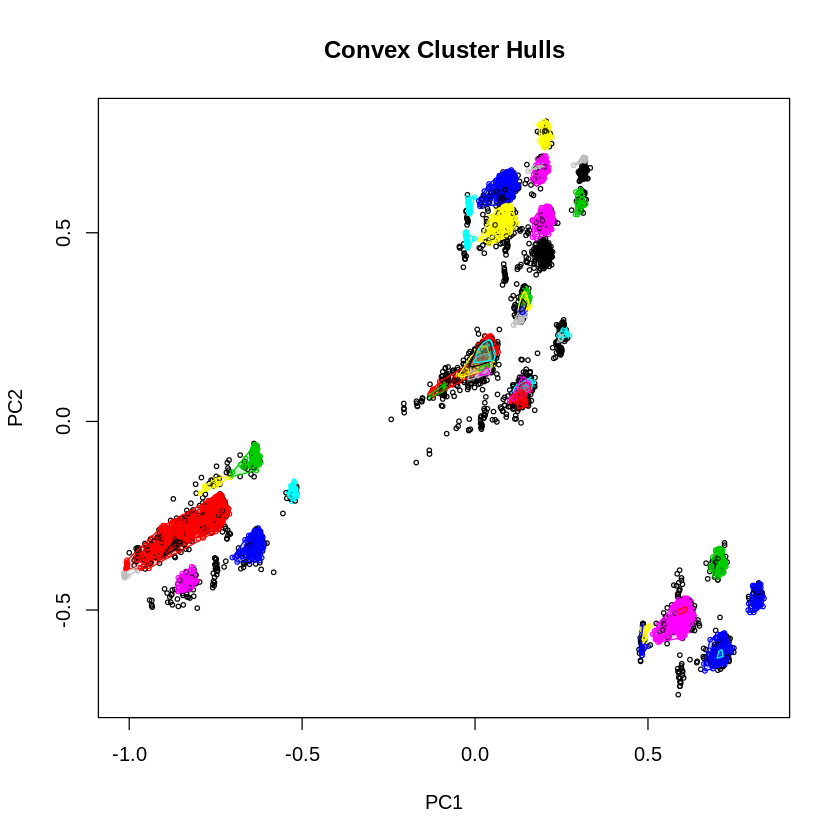

In [ ]:
# We also plot our clusters as shown
# ---
# The dataset and cluster method of dbscan is used to plot the clusters.
# 
hullplot(it,db$cluster)

An advatage of using DBSCAN custering is that it is highly effective in dealing with outliers which are categorized as noise. From the 

In [ ]:
# import appropriate packages
install.packages('fpc')
library(fpc)
library(dbscan)
if(!require(devtools)) install.packages('devtools')
devtools::install_github('kassambara/factoextra')
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




conquer    (NA    -> 1.0.2  ) [CRAN]
lme4       (NA    -> 1.1-23 ) [CRAN]
rio        (NA    -> 0.5.16 ) [CRAN]
quantreg   (NA    -> 5.67   ) [CRAN]
pbkrtest   (NA    -> 0.4-8.6) [CRAN]
car        (NA    -> 3.0-9  ) [CRAN]
tidyr      (1.1.1 -> 1.1.2  ) [CRAN]
callr      (3.4.3 -> 3.4.4  ) [CRAN]
rstatix    (NA    -> 0.6.0  ) [CRAN]
viridis    (NA    -> 0.5.1  ) [CRAN]
ggpubr     (NA    -> 0.4.0  ) [CRAN]
FactoMineR (NA    -> 2.3    ) [CRAN]
dendextend (NA    -> 1.14.0 ) [CRAN]


Installing 13 packages: conquer, lme4, rio, quantreg, pbkrtest, car, tidyr, callr, rstatix, viridis, ggpubr, FactoMineR, dendextend

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpdtjMT0/remotese4c78b9a02b/kassambara-factoextra-1689fc7/DESCRIPTION’
─  preparing ‘factoextra’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘factoextra_1.0.7.999.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



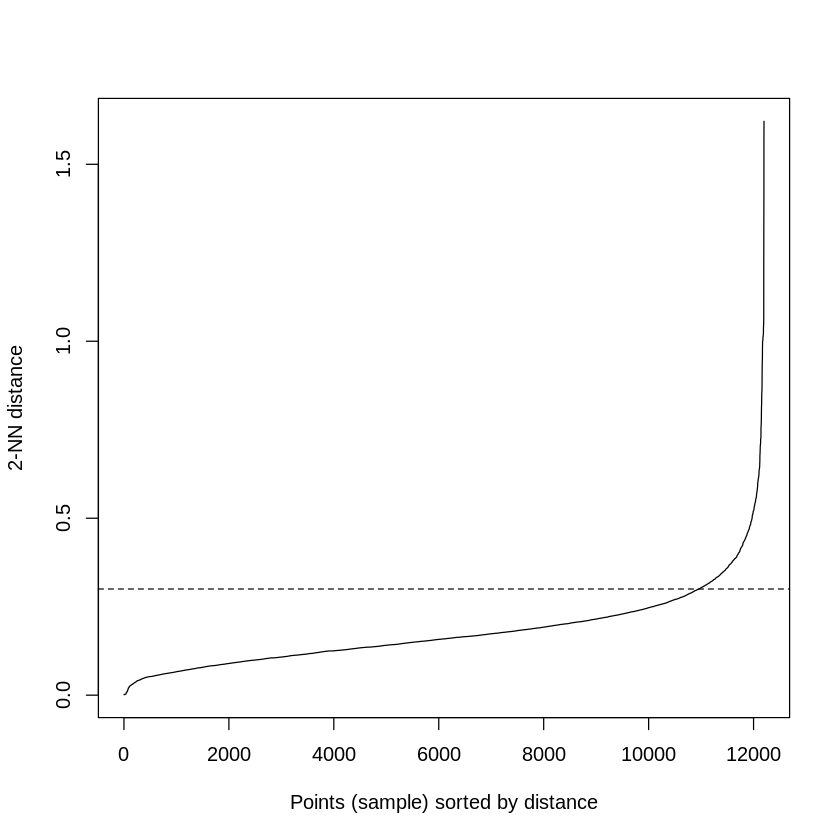

In [ ]:
# obtain optimal eps value
kNNdistplot(it, k=2)
abline(h = 0.3, lty=2)